# Lecture 22 - Numerical Integration

## Overview, Objectives, and Key Terms
 
In [Lecture 21](ME400_Lecture_21.ipynb), finite-difference approximations were developed and used to evaluate derivatives numerically.  In this lecture, we'll explore and implement our own numerical methods for evaluation of integrals.  We'll also use the SciPy module for the first time, which provides its own set of tools for numerical integration.
 
### Objectives

By the end of this lesson, you should be able to

- Evaluate definite integrals numerically using left- and right-sided Riemann sums, the mid-point rule, and the trapezoid rule.
- Evaluate definite integrals numerically using the built-in functions of `scipy.integrate`
- Establish the order of an integration scheme using numerical, graphical, or symbolic means.

### Key Terms

- Riemann sum
- left-sided Riemann sum
- right-sided Riemann sum
- mid-point rule
- trapezoid rule
- `scipy.integrate`
- `scipy.integrate.quad`
- $n$th-order approximation

## Riemann Sums in Practice

For derivatives, we took a limit of a finite difference for an exact answer but stopped that limit for a sufficiently small $\Delta$ to ensure a reasonable estimate.  For the first derivative, we saw the first-order forward and backward schemes along with the  second-order central difference scheme.  For integrals, we have analogs to these choices based on how we define the rectangles of our Riemann sum.

In [Lecture 19](ME400_Lecture_19.ipynb), our Riemann sum was

$$
  S = \frac{b-a}{n} \sum^{n}_{i=1} f \Bigg ( \frac{ i(b-a) }{n} + a \Bigg ) 
$$

Let's look at this concretely for $f(x) = x^2$ over $x\in[0, 1]$ with $n=5$:

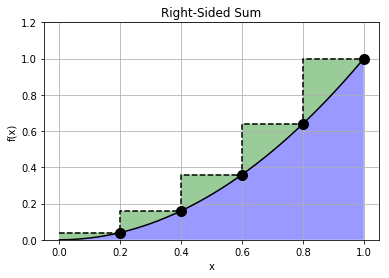

In [1]:
import riemann_sum_plots
riemann_sum_plots.right_sided_sum()

Notice that the height of a rectangle is equal to the function evaluated at the rectangle's right :math:`x` coordinate.  We call such a sum a  *right-sided* Riemann sum. For this particular  function, this right-sided sum leads to some significant over estimation.  

If instead we defined our sum to be

$$
  S =\frac{b-a}{n} \sum^{n}_{i=1} f \Bigg ( \frac{ (i-1)(b-a) }{n} + a \Bigg ) 
$$

the picture becomes

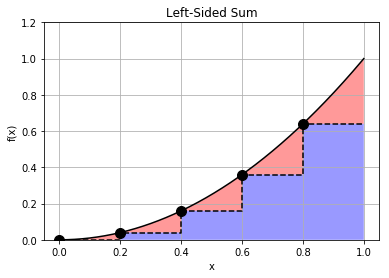

In [2]:
riemann_sum_plots.left_sided_sum()

Here, the rectangle height is based on the function evaluated at its 
left side, making this a *left-sided* Riemann sum.  Just as the right-sided
sum *overestimates* the integral, the left-sided sum *underestimates* 
the integral.

***

**Exercise**:  Given the points $x = [0, 2/3, 4/3, 2]$ and corresponding values $y = [1, 3/5, 3/7, 1/3]$, estimate $\int^2_0 y(x)dx$ using the right-sided sum and left-sided sum.  What is the true value (assuming $y = (x+1)^{-1}$)?

***

**Exercise**:  Consider the following two columns of data:

| $x$   | $\sqrt{x}$ |
|-------|------------|
|0.0000 | 0.0000     |
|0.3333 | 0.5774     |
|1.0000 | 1.0000     |
|1.5000 | 1.2247     |
|2.0000 | 1.4142     |

Estimate $\int^2_0 f(x) dx$ using the right-sided sum and left-sided sum.  Note that the $x$ points are not evenly spaced.

***


## Beyond the One-Side Sums

Can we do better?  Remember, I said that the forward, backward, and central
finite-difference approximations have analogous Riemann sums.  Here,
take the right- and left-sided sums to be like the forward and backward
differences.  If you hadn't noticed, the central difference is nothing
but an *average* of the forward and backward differences:

$$
  \frac{1}{2} \Bigg ( \frac{f(x+h)-f(x)}{h} + \frac{f(x)-f(x-h)}{h} \Bigg ) = \frac{f(x+h)-f(x-h)}{2h}
$$

so we might expect something similar for the Riemann sums.  There are
two possibilities.  First, we can evaluate the rectangle heights at the 
average value of its $x$ coordinates, i.e.,

$$
 S = \frac{b-a}{n} \sum^{n}_{i=1} f \Bigg ( \frac{ (i-1/2)(b-a) }{n} + a \Bigg ) 
$$
  
for which the picture becomes

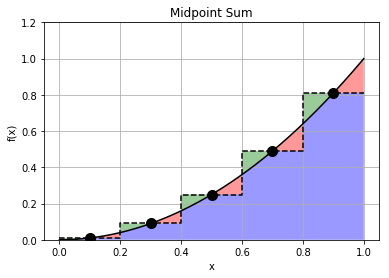

In [3]:
riemann_sum_plots.midpoint_sum()

This method is often called the **midpoint rule**, and it's probably my 
favorite integration scheme because it's pretty accurate and dirt simple
to implement.

The alternative is to average the right- and left-sided sums, which leads
to 

$$
\begin{split}
  S &= \frac{b-a}{2n} 
    \Bigg [ \sum^{n}_{i=1} f \Bigg ( \frac{ (i)(b-a) }{n} + a \Bigg ) 
         +  \sum^{n}_{i=1} f \Bigg ( \frac{ (i-1)(b-a) }{n} + a \Bigg ) \Bigg ] \\
    &= \frac{b-a}{2n} 
    \Bigg [ f(a) + f(b) + \sum^{n-1}_{i=1} f \Bigg ( \frac{ i(b-a) }{n} + a \Bigg ) \Bigg ]  
\end{split}
$$
  
If you consider this carefully, the resulting geometric picture turns
rectangles into trapezoids (because the average of the area of 
two rectangles of heights $y(x_1)$ and $y(x_2)$ that share 
the same $x$ coordinates $x_1$ and
$x_2$ is equal to the area of the trapezoid whose coordinates
include $(x_1, y_1)$ and $(x_2, y_2)$),
and the method is known as the **trapezoid rule**.  (It's those pesky
end-point terms $(a)$ and $f(b)$
that make this rule just a hair less convenient to 
apply in some cases, so I always stick to the midpoint rule when I can!)

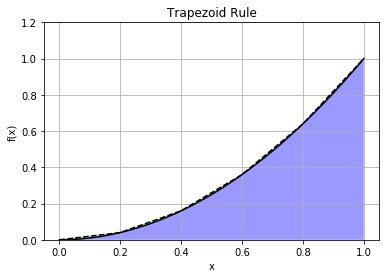

In [4]:
riemann_sum_plots.trapezoid_rule()

For a function $f(x)$ with sufficiently nice properties (beyond
our scope), it's not too difficult to estimate the error associated
with these integrals as $\Delta = (b-a)/n$ goes to zero (or 
equivalently, $n \to \infty$.  However, I'll skip giving away the 
answers and let you determine these properties by numerical experiments
in the homework!

Finally, the integration rules just explored represent the simplest 
possible [Newton-Cotes](http://mathworld.wolfram.com/Newton-CotesFormulas.html) formulas.  The basic idea of Newton-Cotes 
integration is that a function $f(x)$ is assumed to be piece-wise
polynomial in finite ranges and evaluated at evenly-spaced points $x_i$.  Left-sided sums, right-sided sums, and
and the midpoint rule take 
$f(x)$ to be *constant* between adjacent points $x_i$ and
$x_{i+1}$, while the trapezoid rule assumes $f(x)$ is 
*linear* between adjacent points.  If $f(x)$ is assumed to 
be quadratic between $x_i$ and $x_{i+2}$, the 
result is [Simpson's rule](http://mathworld.wolfram.com/SimpsonsRule.html) (another favorite of mine).  

***
**Exercise**:  Suppose you accessed your fancy phone's accelerometer log and extracted the following accelerations (in m/s$^2$)  and times (in s):
```
a = 0, 0.1, 0.3, -0.2, 0.1
t = 2, 4, 6, 8, 10
```
Estimate how far you went in those 8 seconds using the trapezoid rule.
***

**Exercise**:  Recall that the incremental work $\delta W$ done by an expanding gas is given by $\delta W = p \delta V$, where $p$ is pressure and $\delta V$ is the change in volume.  Consider the following table of measured pressures (MPa) for several volumes (cm ^3^) during the expansion of the gas within an internal combustion engine.

| $p$     |  $V$     |
|---------|----------|
| 15.6835 | 79.8508  |
| 12.7127 | 88.6913  |
| 9.3703  | 103.3057 |
| 6.5612  | 123.4549 |
| 4.5031  | 149.0202 |
| 2.0138  | 222.8411 |

Estimate the work performed by the gas using the trapezoid rule.  

***

**Exercise**: Revisit the last exercise by determinging the $n$ that satisfies $pV^n = c$ for some constant $c$.  Then, using the same measured data, apply the midpoint rule to estimate the work done by the gas.

***

## What About Accuracy?

As was done for the finite-difference methods, it is possible to determine the *order* of various numerical integration rules.  The basic idea is to observe the (absolute) error between an exact, reference value for an integral and the approximation of that integral for various step sizes $\Delta$.

***
**Exercise**:  Determine whether the right-sided sum is first order or second order using the definite integral $\int^1_0 e^x dx = e - 1$ as a test case.  

*Solution*:

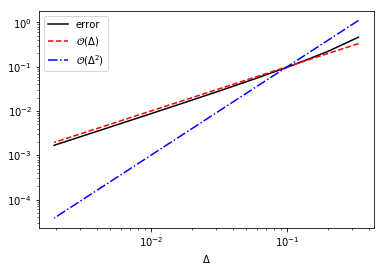

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def right_sided_sum(f, a, b, n):
    """Approximate the integral of f over [a, b] using 
       the right-sided sum and n evenly spaced points."""
    x = np.linspace(a, b, n+1)[1:]
    return np.sum(f(x))*(x[1]-x[0])

# reference integral value
I_ref = np.exp(1) - 1.0 
# number of points to use in each sum
n_vals = 2**np.arange(1, 10)
# initialize the approximate integrals
I_appx = np.zeros(len(n_vals))
for i in range(len(n_vals)):
    I_appx[i] = right_sided_sum(np.exp, 0, 1, n_vals[i])
# absolute error
I_err = abs(I_appx-I_ref)
# Delta = (b-a)/(n+1)
Delta = 1/(n_vals+1)
# Plot the error along with linear and quadratic forms
plt.loglog(Delta, I_err, 'k', label='error')
plt.loglog(Delta, Delta, 'r--', label='$\mathcal{O}(\Delta)$')
plt.loglog(Delta, 10*Delta**2, 'b-.', label='$\mathcal{O}(\Delta^2)$')
plt.xlabel('$\Delta$')
plt.legend()
plt.show()

Surely, the error is much closer to the $\mathcal{O}(\Delta)$ term and, hence, the right-sided sum is *first order*.

***

**Exercise**:  Determine the order of the left-sided sum, midpoint rule, and trapezoid rule.  You may use the definite integral $\int^1_0 e^x dx = e - 1$ as a test case.  

***

## Using `scipy.integrate`

As alternatives to the simple schemes explored above, several integration schemes are provided by `scipy.integrate`.  SciPy is a large collection of open-source, Python tools for numerical and other scientific computing. For example, NumPy is a major component of SciPy but is often used as a standalone package (as are Matplotlib and SymPy).

Other schemes exist for multidimensional integration.

SciPy offers several integrations schemes in its `scipy.integrate` module.  However, the best choice for  most problems is the `quad` function, which is based on a [Gauss-Kronrod](http://mathworld.wolfram.com/Gauss-KronrodQuadrature.html) scheme.  Here it is in action:

In [26]:
from scipy.integrate import quad
quad(np.exp, a=0, b=1)

(1.7182818284590453, 1.9076760487502457e-14)

By default, `quad` returns both the approximate integral and the estimated absolute error.  Here, that error is ridiculously small (close to machine precision).  For many problems, that's all that one needs to do in order to compute an integral.  However, `quad` does have a variety of optional input parameters, and, as always, you may learn more by executing `help(quad)`.

Other functions in `scipy.integrate` that are of interest include `trapz` (the trapezoid rule) and `simps` (Simpson's rule).  Use of `help` on each function is recommended, as examples are provided in the documentation.

## Further Reading

None.